## Задание:

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

# Гамма-распределение (Распределение Эрланга)

Гамма-распределение является обобщением рапсределения хи-квадрат и, соответственно, экспоненциального распределения. Суммы квадратов нормально распределённых величин, а также суммы величин распределённых по хи-квадрат и по экспоненциальному распределению будут иметь гамма-распределение.  
 Широко применяется для моделирования сложных потоков событий, сумм временных интервалов между событиями, в экономике, теории массового обслуживания, в логистике, описывает продолжительность жизни в медицине. Является своеобразным аналогом дискретного отрицательного биномиального распределения.

Функция плотности вероятности:

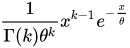

где Г(k) — гамма-функция Эйлера.

Определяется двумя неотрицательными параметрами а — число степеней свободы (при целом значении степеней свободы, гамма-распределение называется распределением Эрланга) и коэффициент масштаба θ.  

In [517]:
k = 2 
θ = 1 

In [518]:
import pandas as pd
import numpy as np
from scipy.stats import gamma, norm
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Сгенерируем из нашего распределения выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения.

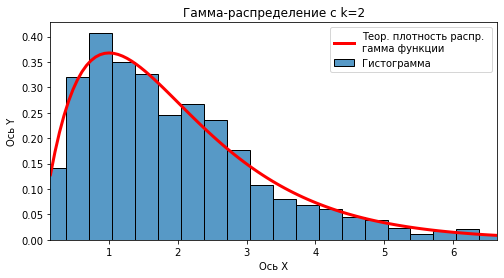

In [519]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

random_1000 = gamma.rvs(k, size=1000)# генерация 1000 случайных значений 
sns.histplot(random_1000, stat='density', common_norm=True, kde=False, label='Гистограмма', ax=ax) # построение гистограммы

x = np.linspace(gamma.ppf(0.01, k), gamma.ppf(0.99, k), 100) # равномерно выбираем 100 точек и строим ф-ю плотности распр.
sns.lineplot(x=x, y=gamma.pdf(x, k), color='red', lw=3, alpha=1, label='Теор. плотность распр. \nгамма функции', ax=ax) 

# дополняем подписями
ax.set_title('Гамма-распределение c k=2')
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.set(xlim=(gamma.ppf(0.01, k), gamma.ppf(0.99, k)))

fig.show()

Для трёх n = (5, 25, 100) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних.

In [520]:
def samples_average(n): # функция возвращает массив из 1000 выборочных средних из n элементов
    return [mean(gamma.rvs(a, size=n)) for _ in range(1000)]

In [521]:
n_5 = samples_average(5)
n_25 = samples_average(25)
n_100 = samples_average(100)

Так выглядят распределения средних наших выборок - уже видно, что чем больше выборка, тем больше распределение средних становится похоже на нормальное

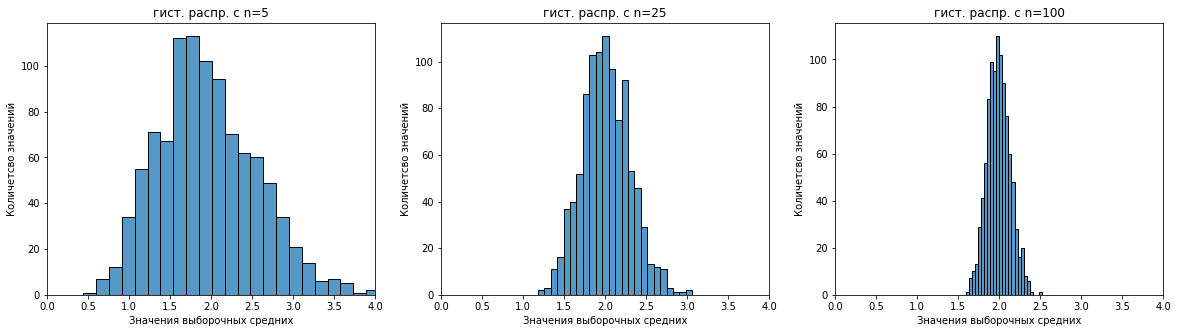

In [522]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(n_5, kde=False, ax=ax[0]) # строим гистограммы для каждого значения n (n = 5)
ax[0].set_title('гист. распр. с n=5')
ax[0].set_xlabel('Значения выборочных средних')
ax[0].set_ylabel('Количество значений')
ax[0].set(xlim=(0, 4))

sns.histplot(n_25, kde=False, ax=ax[1]) # n = 25
ax[1].set_title('гист. распр. с n=25')
ax[1].set_xlabel('Значения выборочных средних')
ax[1].set_ylabel('Количество значений')
ax[1].set(xlim=(0, 4))

sns.histplot(n_100, kde=False, ax=ax[2]) # n = 100
ax[2].set_title('гист. распр. с n=100')
ax[2].set_xlabel('Значения выборочных средних')
ax[2].set_ylabel('Количество значений')
ax[2].set(xlim=(0, 4))

fig.show()

##### Найдем параметры гамма-распределения

In [524]:
mean, var, skew, kurt = gamma.stats(a, moments='mvsk') # mean - мат. ожидание, var - дисперсия 
print('Мат. ожидание:', mean)
print('Дисперсия:', var)

Мат. ожидание: 2.0
Дисперсия: 2.0


#### Посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних  
Для каждого n посчитаю теоретическое мат. ожидание, дисперсию и среднеквадратичное отклонение и заодно сравню их с практическими, полученными из соответствующих выборок(можно наглядно увидеть разницу :)

In [525]:
df = pd.DataFrame({'N':              [5, 25, 100],
              'Теор. Мат. ожидание': [2, 2, 2],
              'Прак. Мат. ожидание': [np.mean(n_5), np.mean(n_25), np.mean(n_100)],
              'Теор. Дисп.':         [ 2 / 5, 2 / 25, 2 / 100 ],
              'Практ. Дисп.':        [np.var(n_5), np.var(n_25), np.var(n_100)],
              'Теор. Сред. откл.':   [(2 / 5)**0.5 , (2 / 25)**0.5, (2 / 100)**0.5 ], 
              'Практ. Сред. откл.':  [np.var(n_5)**0.5, np.var(n_25)**0.5, np.var(n_100)**0.5] })
df # значения параметров нормальных распределений

,N,Теор. Мат. ожидание,Прак. Мат. ожидание,Теор. Дисп.,Практ. Дисп.,Теор. Сред. откл.,Практ. Сред. откл.
0,5,2,1.953059,0.40,0.365330,0.632456,0.604425
1,25,2,2.008826,0.08,0.084608,0.282843,0.290875
2,100,2,1.991755,0.02,0.019248,0.141421,0.138737


Посчитав теоретические значения параметров - покажу (на одном графике для каждого n) гистограмму, а поверх нее - плотность соответствующего нормального распределения, где loc - соответствующее теоретическое мат. ожидание и scale - сред. откл.

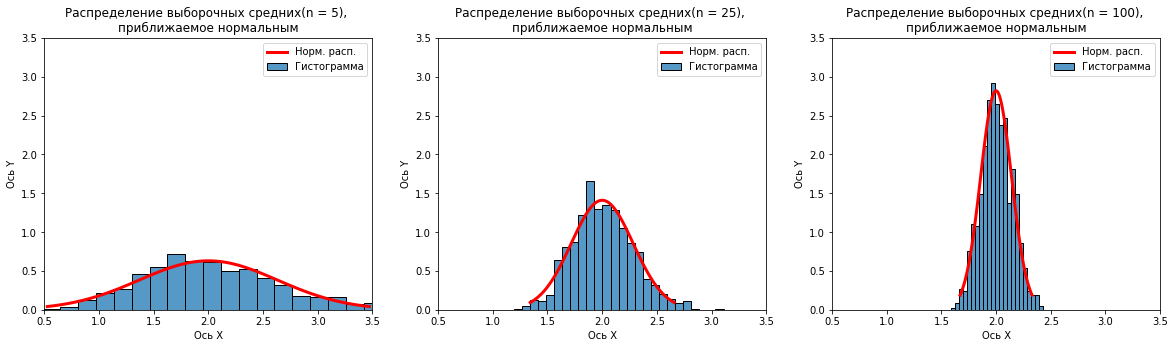

In [499]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

# Для n = 5:
# строим нормализированную гистограмму для n = 5
sns.histplot(n_5, stat='density', common_norm=True, kde=False, label='Гистограмма', ax=ax[0])

# выбираем 100 точек и строим норм. распр. с соответствующими параметрами
x = np.linspace(norm(loc=2, scale=0.632456).ppf(0.01), norm(loc=2, scale=0.632456).ppf(0.99), 100)
sns.lineplot(x=x, y=norm(loc=2, scale=0.632456).pdf(x), color='red', lw=3, alpha=1, label='Норм. расп.', ax=ax[0]) 

# дополняем подписями
ax[0].set_title('Распределение выборочных средних(n = 5), \nприближаемое нормальным')
ax[0].set_xlabel('Ось X')
ax[0].set_ylabel('Ось Y')
ax[0].set(xlim=(0.5, 3.5))
ax[0].set(ylim=(0, 3.5))

# Повторяем для n = 25:
sns.histplot(n_25, stat='density', common_norm=True, kde=False, label='Гистограмма', ax=ax[1])

x = np.linspace(norm(loc=2, scale=0.282843).ppf(0.01), norm(loc=2, scale=0.282843).ppf(0.99), 100)
sns.lineplot(x=x, y=norm(loc=2, scale=0.282843).pdf(x), color='red', lw=3, alpha=1, label='Норм. расп.', ax=ax[1]) 

ax[1].set_title('Распределение выборочных средних(n = 25), \nприближаемое нормальным')
ax[1].set_xlabel('Ось X')
ax[1].set_ylabel('Ось Y')
ax[1].set(xlim=(0.5, 3.5))
ax[1].set(ylim=(0,3.5))

# Повторяем для n = 100:
sns.histplot(n_100, stat='density', common_norm=True, kde=False, label='Гистограмма', ax=ax[2])

x = np.linspace(norm(loc=2, scale=0.141421).ppf(0.01), norm(loc=2, scale=0.141421).ppf(0.99), 100)
sns.lineplot(x=x, y=norm(loc=2, scale=0.141421).pdf(x), color='red', lw=3, alpha=1, label='Норм. расп.', ax=ax[2]) 

ax[2].set_title('Распределение выборочных средних(n = 100), \nприближаемое нормальным')
ax[2].set_xlabel('Ось X')
ax[2].set_ylabel('Ось Y')
ax[2].set(xlim=(0.5, 3.5))
ax[2].set(ylim=(0, 3.5))

fig.show()

Наглядно видим, что с ростом n увеличивается и точность аппроксимации распределения выборочных средних нормальным распределением(меньшый объем выбросов)

## Вывод

В своей работе я наглядным путем выяснил принцип действия центральной предельной теоремы. 
На примере гамма-распределения я подтвердил, что распределение моего выборочного среднего(случайно выбранной функции) при достаточном количетстве выборок стремится к нормальному.  
  
Также я подтвердил справедливость формул, вычисляющих значения параметров нормальных распределений, которыми(согласно ЦПТ) приближается распределение выборочных средних - а именно формулы для нахождения среднеквадратического отклонения(для получающегося нормального распределения моих выборочных средних) - теор. и практ. значения(таблица) довольно близки + хорошая точность аппроксимации на последнем графике.  

Ну и само собой теперь очевидно, что чем больше мы берем число выборок n - тем ближе распределение будет к нормальному и тем лучше(с меньшей погрешностью) оно будет аппроксимироваться функцией распределения  
:)